In [437]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import MarksConstants as mc
from scipy.optimize import curve_fit

## kinetic energy release in light assisted collisions

This model treats the collisions in one dimension by fixing one atom in space and solving for the motion of the other atom as it experiences the repulsive potential from the resonant dipole interaction. 

$\begin{aligned}
& T=\frac{1}{2} m \dot{r}^2 \quad U=-\frac{C_3}{r^3} \\
\\
& \mathcal{L}=\frac{1}{2} m \dot{r}^2+\frac{C_3}{r^3} \\
\\
& \frac{d}{d t}\left(\frac{\partial \mathcal{L}}{\partial \dot{r}}\right)-\frac{\partial \mathcal{L}}{\partial r}=0 \\
\\
& \rightarrow \quad \ddot{r}=\frac{3 C_3}{mr^4} \\
&
\end{aligned}$

Solving this and plotting $r(t)$ and  $\dot{r}(t)$ with an initial conditions of $r(0) = 50  \ \mathrm{nm}$ and $\dot{r}(0)=0$ gives

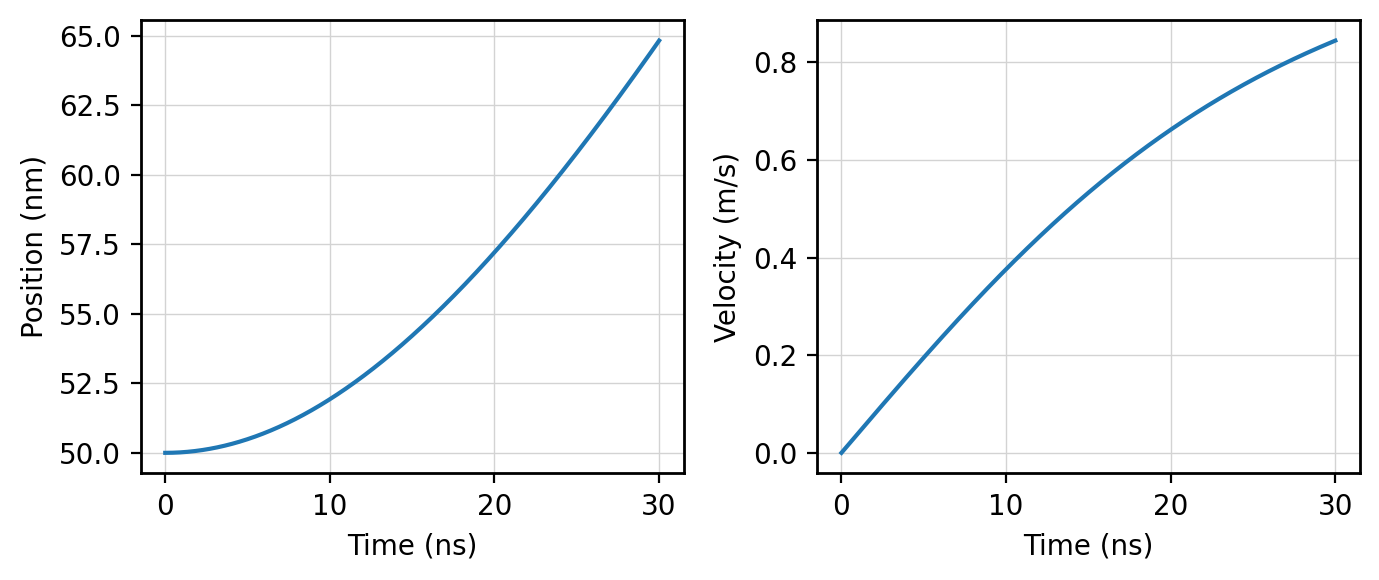

In [434]:
m = mc.Rb87_M
C3 = mc.Rb87_C3*2
# print(C3/m)

# m = 1
# C3=1
c = 16000e9*mc.a0**3
# print(c)

# Define the differential equation
def diff_eq(t, y):
    dydt = np.zeros(2)
    dydt[0] = y[1]
    dydt[1] = 3*C3/(m*y[0]**4)
    # dydt[1] = 3*c/(y[0]**4)
    return dydt

# Define initial conditions
y0 = [50e-9, 0]

# Define time span for which to solve the differential equation
t_span = [0, 30e-9]
times = np.linspace(0,30e-9,1000)

# Solve the differential equation
sol = solve_ivp(diff_eq, t_span, y0,t_eval=times)

# Plot the solution
fig, axs = plt.subplots(1, 2, figsize=(7, 3))

axs[0].plot(sol.t*1e9, sol.y[0]*1e9)
axs[0].set_xlabel('Time (ns)')
axs[0].set_ylabel('Position (nm)')
axs[0].grid(color='lightgray', linestyle='-', linewidth=0.5)
axs[1].plot(sol.t*1e9, sol.y[1])
axs[1].set_xlabel('Time (ns)')
axs[1].set_ylabel('Velocity (m/s)')

plt.rcParams['font.size'] = 10
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1.0    
plt.rcParams['figure.dpi'] = 200
plt.grid(color='lightgray', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()


For an excited state lifetime of $27.7 \ \mathrm{ns}$, the atoms gain kinetic energy proportional to $v= 0.8 \ \mathrm{m/s}$.

Using $E = \frac{1}{2} k_b T$ where $T$ is related to $v$ by the waist of 1D Gaussian velocity distribution $v=\sqrt{4k_BT/m}$, we get 

$T = \frac{mv^2}{4 k_b} \ \ \ \rightarrow \ \ \ \ E= \frac{1}{8}mv^2$

In MHz, this gives $E = 17.5$ MHz which is pretty close to the trap depth 20 MHz. Since this is the total energy it is shared evenly between each atom which would suggest about LAC 2 cycles are needed to kick an atom out. According to the estimated 2-1 rate of 0.2/ms, this would suggest the 2-1 collisions saturate around 10 ms which is roughly what we see.

A plot of energy release in MHz as a function of the final velocity and the Condon radius is shown below.

/var/folders/p1/sslzk5t517d2pwp06md4xf_w0000gn/T/ipykernel_799/542542499.py:8: RuntimeWarning: divide by zero encountered in divide
  return a/x**b +c


Fitted parameters: [ 3.90152501e+07  3.64228118e+00 -5.52445338e+00]


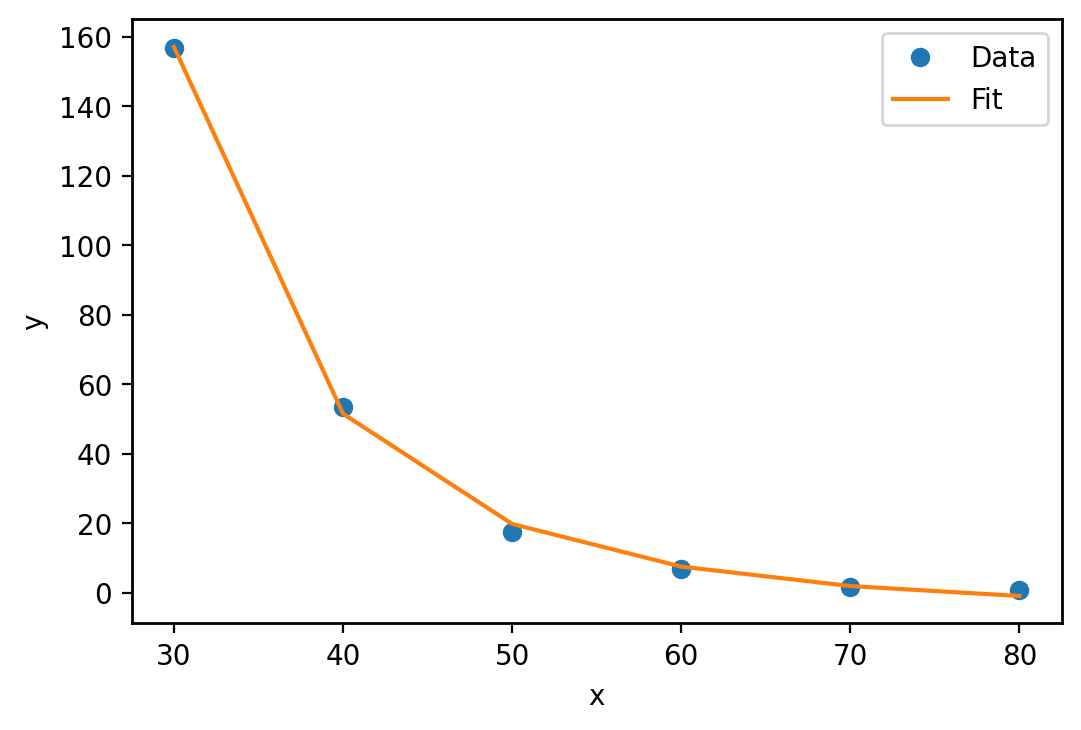

In [422]:
v = np.array([2.4,1.4,.8,.5,.25,0.16])
rc = np.array([30,40,50,60,70,80])
vlist=[2.4,1.4,.8,.5,.25,0.16]
energies=[]
for i in vlist:
    en = E(i)
    energies.append(en)
ener = np.array(energies)

# Fit the data to the function
def rcVsV(x, a,b,c):
    return a/x**b +c

ydata = ener
xdata = rc

popt, pcov = curve_fit(rcVsV, xdata, ydata)

print('Fitted parameters:', popt)

# Plot the data and the fitted function
plt.plot(xdata, ydata, 'o', label='Data')
plt.plot(xdata, rcVsV(xdata, *popt), '-', label='Fit')
plt.xlabel('x')
plt.ylabel('y')
# plt.xlim(10,80)
# plt.ylim(0,10)
plt.legend()
plt.show()


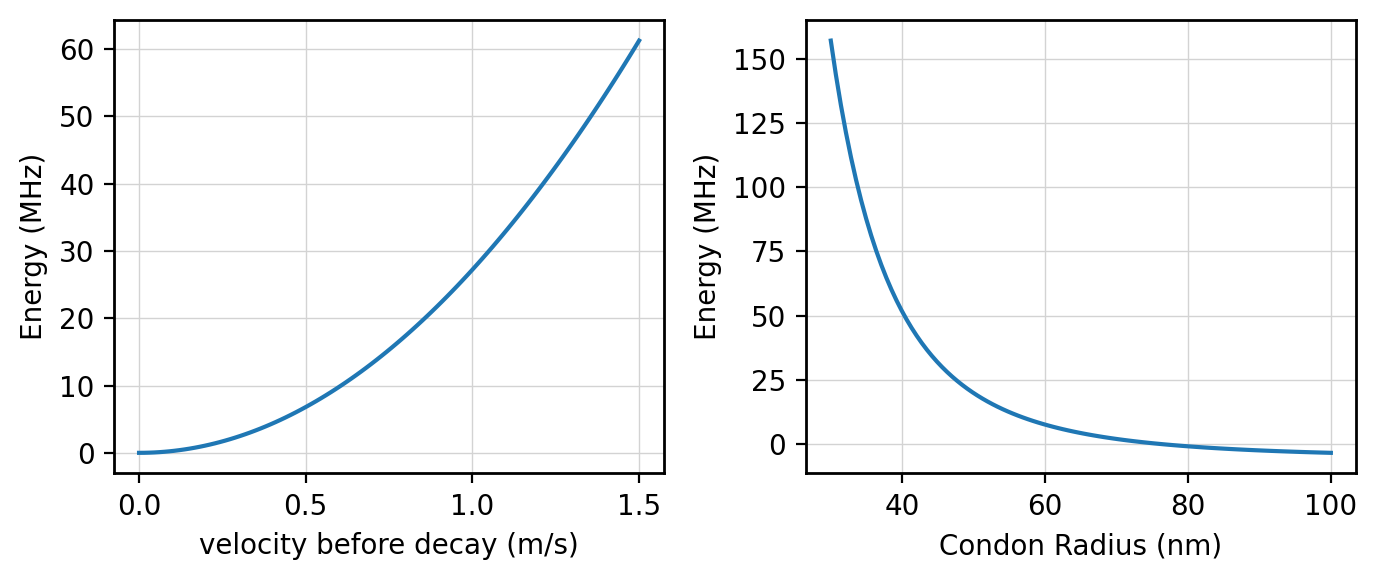

In [436]:
# convert velocity to energy in MHz
def E(v):
    return 1/8 * mc.Rb87_M*v**2/mc.h*1e-6

# create function using fit parameters for 
def rcVsV(x, a,b,c):
    return a/x**b +c

x1 = np.linspace(0,1.5,100)
x2 = np.linspace(30,100,100)
fig, axs = plt.subplots(1, 2, figsize=(7, 3))
axs[0].plot(x1, E(x1))
axs[0].set_xlabel('velocity before decay (m/s)')
axs[0].set_ylabel('Energy (MHz)')
axs[0].grid(color='lightgray', linestyle='-', linewidth=0.5)
axs[1].plot(x2,rcVsV(x2, 3.90152501e+07 ,3.64228118,-5.52445338))
axs[1].grid(color='lightgray', linestyle='-', linewidth=0.5)
axs[1].set_xlabel('Condon Radius (nm)')
axs[1].set_ylabel('Energy (MHz)');
plt.tight_layout()
